In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet


plt.rcParams["figure.figsize"] = (12, 9)

df = pd.read_csv('all_breakdown.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


In [5]:
x = df.index
y = df['Wind Total'.upper()]
hour = df['Hour'].astype(int)
quart_day = hour // 4

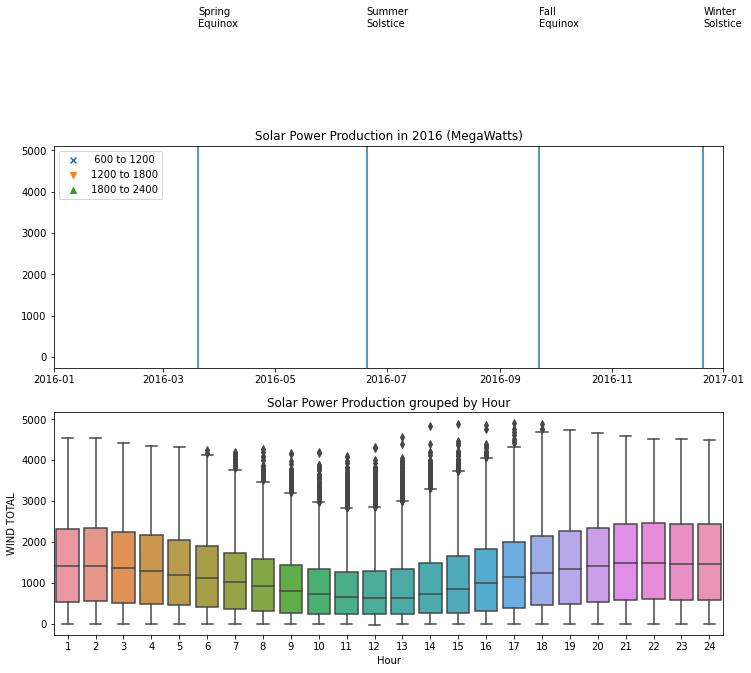

In [6]:
plt.subplot(2, 1, 1)

for h, marker in [(1, 'x'), (2, 'v'), (3, '^')]:
    mask = quart_day == h
    plt.scatter(x[mask], y[mask], marker=marker,  # c=hour[mask].norm(),
                label='{:2}00 to {:2}00'.format(h*6, (h+1)*6))
plt.legend(loc='upper left')
plt.xlim([pd.to_datetime('01/01/2016'), pd.to_datetime('01/01/2017')])
plt.title('Solar Power Production in 2016 (MegaWatts)')

# Add the season change lines
seasons = [(pd.to_datetime('June 20, 2016'), 'Summer Solstice'),
           (pd.to_datetime('December 21, 2016'), 'Winter Solstice'),
           (pd.to_datetime('September 22, 2016'), 'Fall Equinox'),
           (pd.to_datetime('March 20, 2016'), 'Spring Equinox'),
           ]

for s, name in seasons:
    plt.axvline(s)
    plt.text(s, 8000, name.replace(' ', '\n'))


plt.subplot(2, 1, 2)
sns.boxplot(hour, y)

plt.title('Solar Power Production grouped by Hour')
plt.show()

In [7]:
daily_solar = y.resample('48H').mean()
dd = pd.DataFrame(daily_solar)

dd.reset_index(inplace=True)
dd.columns = ['ds', 'y']

# dd['y'] = np.log(dd['y'])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'